## TCP/IP Client example for Unity

References:

* https://pymotw.com/2/socket/tcp.html
* https://wiki.python.org/moin/TcpCommunication
* http://stackoverflow.com/questions/7749341/very-basic-python-client-socket-example
* http://dabeaz.blogspot.co.uk/2010/01/few-useful-bytearray-tricks.html
* http://stackoverflow.com/questions/3896286/image-library-for-python-3
* http://stackoverflow.com/questions/26649716/how-to-show-pil-image-in-ipython-notebook

In [1]:
# Import needed libraries
import socket
import sys
import io
from PIL import Image
import numpy as np
from matplotlib.pyplot import imshow
%matplotlib inline

TCP_IP = '127.0.0.1'
TCP_PORT = 50007
BUFFER_SIZE = 4096

### Connect to Unity server and ask for a Image

In [2]:
# Connect to server
s = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
s.connect((TCP_IP, TCP_PORT))

# Send server command to ask for a image
s.send("imagem".encode())

6

### First 4 bytes will have the total image buffer sizes (Encoded as big endian)

In [3]:
# Get 4 bytes from socket
sizeInfoBA = s.recv(4)
# Convert bytearray(4 bytes) into int32
sizeInfo = int.from_bytes(sizeInfoBA, 
                          byteorder='big', signed=False)
print("Byte array with size: %s, Decoded size: %d" 
      % (sizeInfoBA,sizeInfo))

Byte array with size: b'\x00\x00OA', Decoded size: 20289


### Get Image buffer

In [4]:
recBytes = 0
dataImage = bytearray()
while True:
    # Get some chunk of data
    data = s.recv(BUFFER_SIZE)
    # Append bytearray with received data
    dataImage += data
    # Stop when received at least sizeInfo bytes
    recBytes += BUFFER_SIZE
    if recBytes > sizeInfo:
        break

### Display received image (Encoded as PNG)

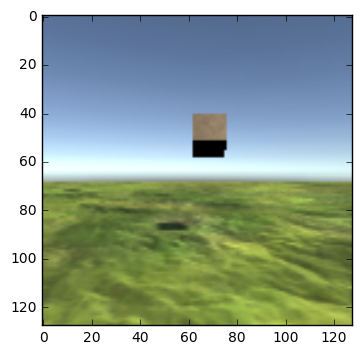

In [5]:
# Convert received byte array to PIL image
img = Image.open(io.BytesIO(dataImage))
imshow(img)

### Ask for some information from the game

In [6]:
# Send server command to ask for a image
s.send("telemetria".encode())
# Get 4 bytes from socket
sizeInfoBA = s.recv(4)
# Convert bytearray(4 bytes) into int32
sizeInfo = int.from_bytes(sizeInfoBA, 
                          byteorder='big', signed=False)
print("Byte array with size: %s, Decoded size: %d" 
      % (sizeInfoBA,sizeInfo))

# Get message text
telemetry_msg = str(s.recv(sizeInfo))
print(telemetry_msg)

Byte array with size: b'\x00\x00\x00\x1c', Decoded size: 28
b'0|0|0|0|0.3694291|5.989079\r\n'
